In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Build Graph

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty directed graph
G = nx.DiGraph()

# Read the dataset and add edges to the graph
with open('/content/drive/MyDrive/Licenta-private/Centrality.csv', 'r') as file:
    next(file)  # Skip the header
    for line in file:
        author, mention = line.strip().split(',')
        G.add_edge(author, mention)


def immunize_nodes(graph, num_nodes):
    # Calculate node centrality based on degree
    centrality = nx.degree_centrality(graph)

    # Sort nodes based on centrality
    sorted_nodes = sorted(centrality, key=centrality.get, reverse=True)

    # Return top num_nodes influential nodes
    return sorted_nodes[:num_nodes], centrality

# Immunize top 5 influential nodes
G = G.to_undirected()
influential_nodes, centrality = immunize_nodes(G, 30)
print("Top 30 influential nodes:", influential_nodes)

Top 30 influential nodes: ['raphousetv2', 'ManUtd', 'Casemiro', 'ProRebornYT', 'washingtonpost', 'theMadridZone', 'GuntherEagleman', 'DenyMilkshakes', 'bayraktar_1love', 'MikeSington', 'SethAbramson', 'AdamMGrant', 'MadridXtra', 'AP', 'greg_price11', 'maria_drutska', 'JoPhoenix1', 'ShlomoibnAderet', 'Victorshi2020', 'noclador', 'american81967', 'Phil_Lewis_', 'NAACP', 'igorsushko', 'Harish_NS149', 'mrsorokaa', 'Aristos_Revenge', 'TheDemCoalition', 'tehseenp', 'hindupost']


## Centrality of nodes

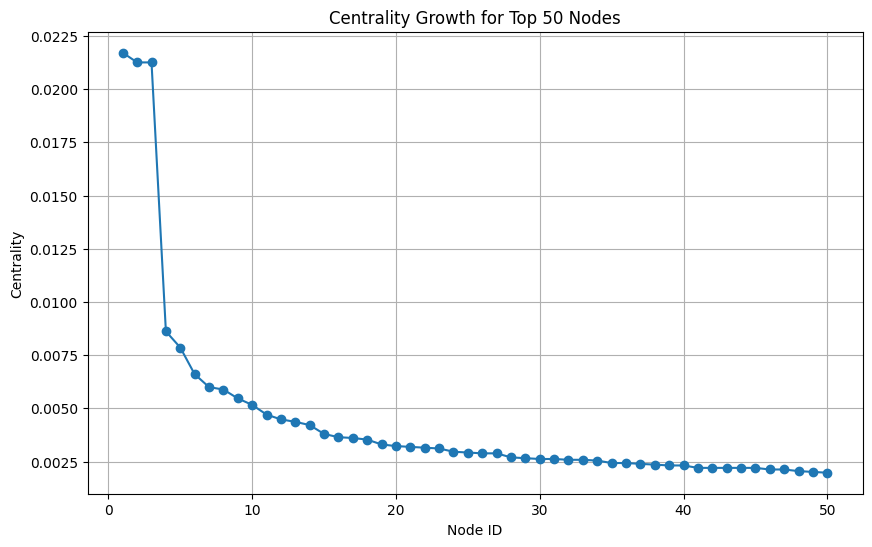

In [ ]:
# Calculate node sizes based on centrality
centrality_values = [centrality[node] for node in influential_nodes]

# Plot centrality growth for top 100 nodes
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), centrality_values, marker='o', linestyle='-')
plt.xlabel('Node ID')
plt.ylabel('Centrality')
plt.title('Centrality Growth for Top 50 Nodes')
plt.grid(True)
plt.show()

# Highest Degree

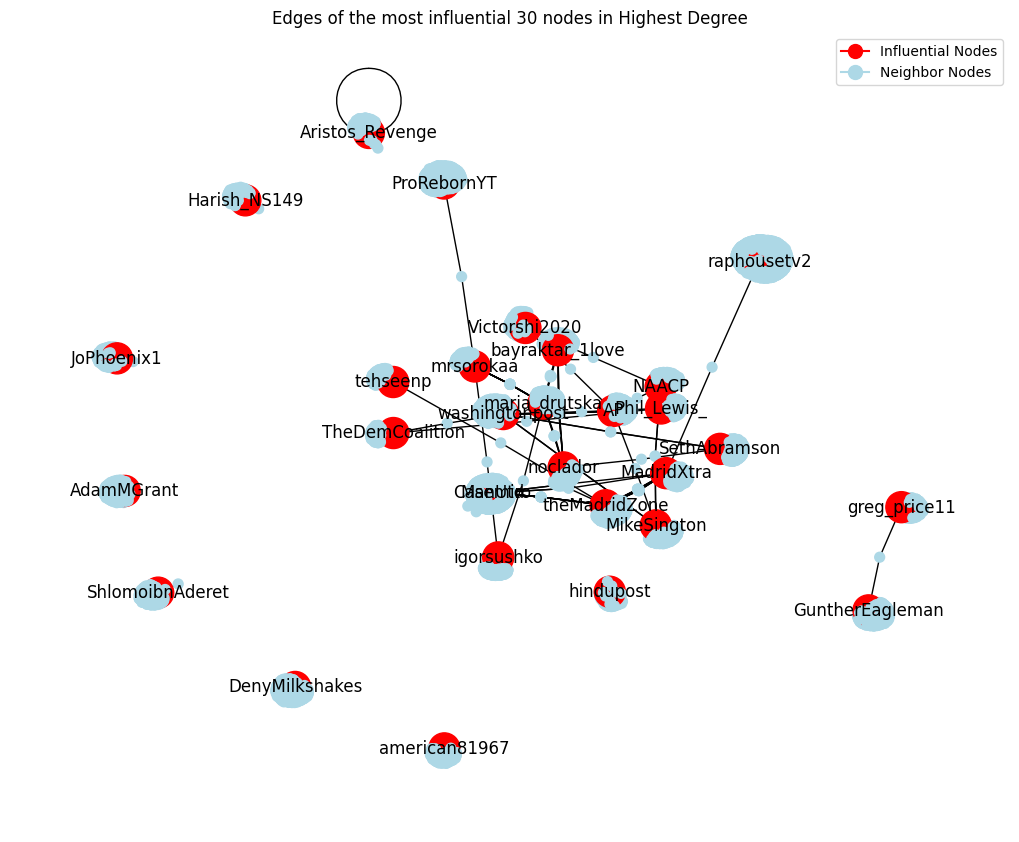

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new subgraph containing only the edges of the nodes in influential_nodes_netshield
edges_to_draw = [(node, neighbor) for node in influential_nodes for neighbor in G.neighbors(node)]
subgraph_edges = G.edge_subgraph(edges_to_draw)

# Assign node colors
node_colors = ['red' if node in influential_nodes else 'lightblue' for node in subgraph_edges.nodes()]
node_sizes = [500 if node in influential_nodes else 50 for node in subgraph_edges.nodes()]

# Create labels for influential nodes
labels = {node: node if node in influential_nodes else '' for node in subgraph_edges.nodes()}

# Draw the subgraph with labels for influential nodes
plt.figure(figsize=(10, 8))
nx.draw(subgraph_edges, with_labels=True, labels=labels, node_color=node_colors, node_size=node_sizes)

# Create a legend
red_patch = plt.Line2D([], [], color='red', marker='o', markersize=10, label='Influential Nodes')
blue_patch = plt.Line2D([], [], color='lightblue', marker='o', markersize=10, label='Neighbor Nodes')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')

plt.title("Edges of the most influential 30 nodes in Highest Degree")
plt.show()

# Net shield

In [ ]:
import numpy as np
from scipy.linalg import eigh

def netShield(A, k):
    # Compute the first eigenvalue lambda and eigenvector u of A
    M = len(G)
    eigenvalues, eigenvectors = eigh(A, eigvals=(M-1, M-1), type=1, overwrite_a=True)
    lambda_ = eigenvalues[0]
    u = eigenvectors[:, 0]

    # Initialize S to be empty
    S = set()

    # Compute scores for each node
    n = len(A)
    scores = np.zeros(n)
    for j in range(n):
        scores[j] = (2 * lambda_ - A[j][j]) * (u[j] ** 2)

    # Iteratively select nodes for S
    for _ in range(k):
        B = A[:, list(S)]
        b = np.dot(B, u[list(S)])
        # Update scores based on the newly added node
        for j in range(n):
            if j not in S:
                scores[j] -= 2 * b[j] * u[j]
            else:
                scores[j] = -1

        # Find the node with the maximum score
        max_score = -float('inf')
        max_node = None
        for j in range(n):
            if j not in S and scores[j] > max_score:
                max_score = scores[j]
                max_node = j

        # Add the node with the maximum score to S
        S.add(max_node)


    return S

# Example usage:
# Assuming you have the adjacency matrix A of your graph G
# Replace A with your actual adjacency matrix
A = nx.adjacency_matrix(G).toarray()
nodelist = [n for n in G.nodes()]
k = 30  # Number of nodes to immunize
S = netShield(A, k)
influential_nodes_netshield = [nodelist[i] for i in S]
print("Top 5 influential nodes (NetShield):", influential_nodes_netshield)


<ipython-input-5-97611de9e183>:7: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  eigenvalues, eigenvectors = eigh(A, eigvals=(M-1, M-1), type=1, overwrite_a=True)


Top 5 influential nodes (NetShield): ['Galatasaray', 'MadridXtra', 'ml27___', 'jessbutprivate', 'jpedrerol', 'theMadridZone', 'EuroExpert_', 'Dambatta_1', 'mmpadellan', 'believer_o', 'RMadridInfo', 'TeamCRonaldo', 'RMadridEngineer', 'rioferdy5', 'kar33m_a', 'jzedn17', 'nytimes', 'UtdPlug', 'Tebasjavier', 'LaLiga', 'vinijr', 'Merhmoud__', 'ManUtd', 'FabrizioRomano', 'GriezmannAlt', 'niamhutd', 'UTDTrey', 'LucasNavarreteM', 'managingmadrid', 'Casemiro']


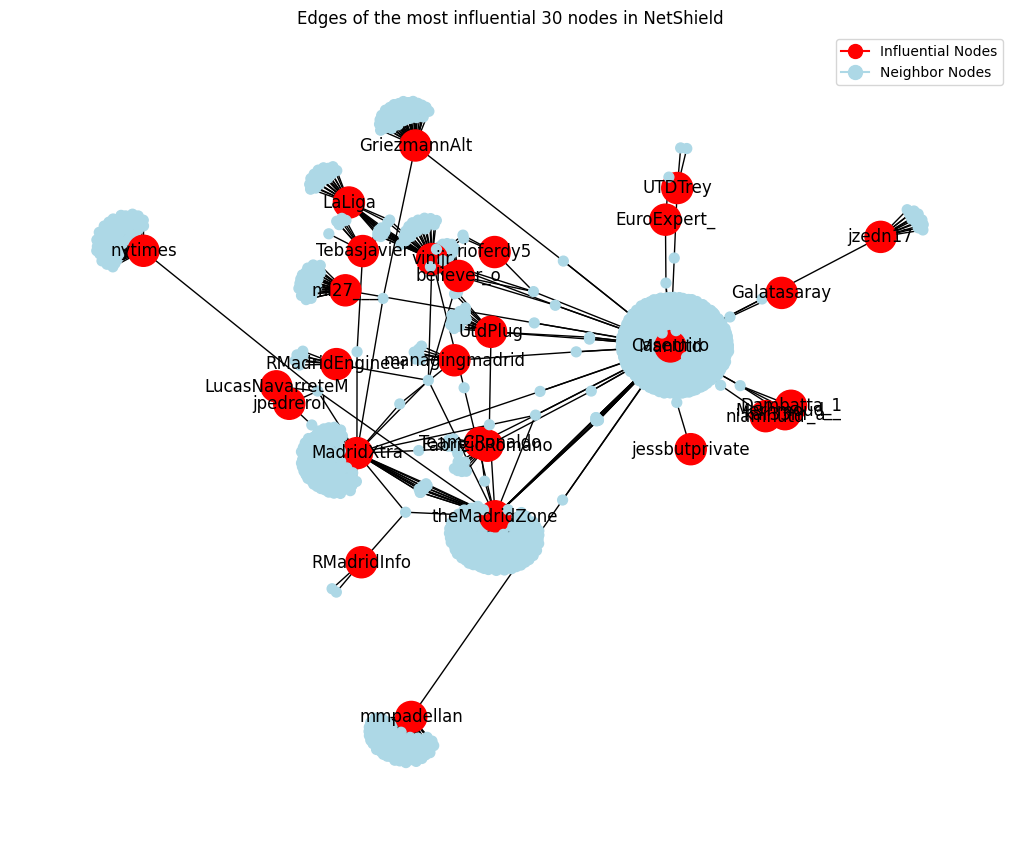

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new subgraph containing only the edges of the nodes in influential_nodes_netshield
edges_to_draw = [(node, neighbor) for node in influential_nodes_netshield for neighbor in G.neighbors(node)]
subgraph_edges = G.edge_subgraph(edges_to_draw)

# Assign node colors
node_colors = ['red' if node in influential_nodes_netshield else 'lightblue' for node in subgraph_edges.nodes()]
node_sizes = [500 if node in influential_nodes_netshield else 50 for node in subgraph_edges.nodes()]

# Create labels for influential nodes
labels = {node: node if node in influential_nodes_netshield else '' for node in subgraph_edges.nodes()}

# Draw the subgraph with labels for influential nodes
plt.figure(figsize=(10, 8))
nx.draw(subgraph_edges, with_labels=True, labels=labels, node_color=node_colors, node_size=node_sizes)

# Create a legend
red_patch = plt.Line2D([], [], color='red', marker='o', markersize=10, label='Influential Nodes')
blue_patch = plt.Line2D([], [], color='lightblue', marker='o', markersize=10, label='Neighbor Nodes')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')

plt.title("Edges of the most influential 30 nodes in NetShield")
plt.show()




In [ ]:
M = len(G)
eigenvalues, eigenvectors = eigh(A, eigvals=(M-1, M-1), type=1, overwrite_a=True)
lambda_ = eigenvalues[0]
u = eigenvectors[:, 0]

<ipython-input-6-f48b79f46f20>:2: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  eigenvalues, eigenvectors = eigh(A, eigvals=(M-1, M-1), type=1, overwrite_a=True)


In [ ]:
print(S)
S2 = {18298}
def calculate_Sv(S, A, lambda_, u):
    sum_term1 = sum(2 * lambda_ * u[i] ** 2 for i in S)
    sum_term2 = sum(A[i, j] * u[i] * u[j] for i in S for j in S)
    return sum_term1 - sum_term2

print(calculate_Sv(S2, A, lambda_, u))
#33.1206169050769
#{18318, 12881, 18323, 18358, 18298}

{1225, 18318, 12881, 18323, 18298, 18334}
16.66829899590508


# Simulator

In [ ]:
import networkx as nx
import numpy as np

class SimpleSimulator:

    def __init__(self, G, seeds):
        self.G = G
        self.seeds = seeds

    def simulate(self, blocked):
        # Perform the simulation without blocking first
        activated_without_blocking = self.simulate_spread(self.G, self.seeds)

        # Perform the simulation with blocking
        G_blocked = self.G.copy()
        G_blocked.remove_nodes_from(blocked)
        # Update seeds after removing blocked nodes
        updated_seeds = [seed for seed in self.seeds if seed not in blocked]
        activated_with_blocking = self.simulate_spread(G_blocked, updated_seeds)

        # Calculate saved nodes
        saved_nodes = set(activated_without_blocking) - set(activated_with_blocking)
        return {
            'activated_without_blocking': len(activated_without_blocking),
            'activated_with_blocking': len(activated_with_blocking),
            'saved_nodes': len(saved_nodes),
            'saved_nodes_list': list(saved_nodes)
        }

    def simulate_spread(self, G, seeds):
        active = set(seeds)
        front_nodes = seeds

        print(G.nodes())

        while front_nodes:
            new_front_nodes = []
            for node in front_nodes:
                # Use successors for directed graphs, neighbors for undirected graphs
                neighbors = G.neighbors(node)

                for neighbor in neighbors:
                    if neighbor not in active and np.random.rand() <= G[node][neighbor].get('weight', 1):
                        active.add(neighbor)
                        new_front_nodes.append(neighbor)
            front_nodes = new_front_nodes

        return active

# Seeds and blocked nodes
seeds = ['FabrizioRomano', 'GriezmannAlt', 'niamhutd', 'UTDTrey', 'LucasNavarreteM', 'managingmadrid', 'Casemiro']
print(influential_nodes_netshield)

# Run the simulator
simulator = SimpleSimulator(G, seeds)
result = simulator.simulate(['Galatasaray', 'MadridXtra', 'ml27___', 'jessbutprivate', 'jpedrerol', 'theMadridZone', 'EuroExpert_', 'Dambatta_1', 'mmpadellan', 'believer_o', 'RMadridInfo', 'TeamCRonaldo', 'RMadridEngineer', 'rioferdy5', 'kar33m_a', 'jzedn17', 'nytimes', 'UtdPlug', 'Tebasjavier', 'LaLiga', 'vinijr', 'Merhmoud__', 'ManUtd'])
print(result)


['Galatasaray', 'MadridXtra', 'ml27___', 'jessbutprivate', 'jpedrerol', 'theMadridZone', 'EuroExpert_', 'Dambatta_1', 'mmpadellan', 'believer_o', 'RMadridInfo', 'TeamCRonaldo', 'RMadridEngineer', 'rioferdy5', 'kar33m_a', 'jzedn17', 'nytimes', 'UtdPlug', 'Tebasjavier', 'LaLiga', 'vinijr', 'Merhmoud__', 'ManUtd', 'FabrizioRomano', 'GriezmannAlt', 'niamhutd', 'UTDTrey', 'LucasNavarreteM', 'managingmadrid', 'Casemiro']
['LilDre888', 'raphousetv2', 'PrancingPapio', 'itzeliiii', 'poke_miners', 'faeisgaee', 'sleepl0ver_', 'crackincocaine2', 'BabyjokerTTV', 'DForsterSensFan', 'MisherFike', 'JO55550908', 'valerie3164', 'scobie', 'dolbelys', 'SatiricalMuse', 'NCAATrackField', 'THE_OG_G_MA', 'weaselx86', 'GavinNewsom', 'aintscarylarry', 'famousboy6', 'Thrilla_dondada', 'wweisawesome123', '_Luna_M__', 'delicategnf', 'DrMLynne', 'SpeakerMcCarthy', 'YallFavDarkSkin', 'BwireFredrick', 'otf_von601', 'Kamalu_Samuel', 'LiaSefume', 'MphathiSidney', 'hobbyistvacay', 'vitaro100', 'SakuraUchihaHq', 'WhoisVi